### neural network를 통한 학습 

- 비선형 변환은 신경망 처럼 신호가 있고 없고, 0 1 처럼 데이터 처리를 짧게 커트하는 것 처럼 느낄 수 있다 
- 선형 변환 - "비선형 변환" - DEEP NETWORK, 하나하나 layer 쌓아가는 것
- 사실 비선형 변환만 빼면 "행렬의 곱은 선형 변환의 합성이다." 라는 것을 알 수 있다. 


### 그 비선형 변환을 통해 뭘 하느냐

- 우리가 일전에 만들었던 데이터 형태를 생각해보자
- 유동인구x, 날짜 z, 우리가 만든 학습 function은 특정 날짜를 넣으면, 4일 이후의 예상 데이터 인구가 나와야 한다
- y^ C R^424 / 위 output y 에서 (y^ - y) 유클라디안 거리^2 이 작을 수록 좋은 것 이다! -> 모델의 정확도 향상
- 행렬 1의 원소 값들, 행렬 2의 원소 값들, b1, b2 .... 의 원소 값들 => w 가 되는 것
- y^은? (y hat) , 우선 `L(w) = (y^ - y)^2` 라고 추상적으로 둬 보자. => ***L를 가장 작게 만들어주는 w 숫자!! 인 것!!***
- w는 다차원이다. 최소점 (x^2 그래프 생각, 꼭지점) 은 알 수 있다. 하지만 다차원의 w는? 임의 점에서 출발한다. 거기서 부터 미분을 하는 것이다. 
    - 미분 값의 **"반대 방향"** 으로 가면 최소값을 향하고 있다. 미분값은 차원의 개수와 동일한 개수로 나온다. 
    - 미분 값은 gradient 라고 부름. 즉 gradient 값 반대로 향하면 된다가 룰이 되는 것
    - 근데 그 얼마나 반대로 갈지 세팅할 수 있다. 그것을 학습률, `"learning rate"` 라고 한다.
    - 텐서플로에서는 이거 자동으로 해줌

### 여기 d3-2 파일은 위 과정을 코드로 표현한는 것임



In [30]:
# 사전 세팅 및 import
# To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" # "all" 이면, jupyter output 여러개 한 꺼 번에 보기! 

DATA_PATH: str = "./datas/"

import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd

In [31]:

# d3 ex2-1

p1, p2 = (5, 8) # 이 값과, n 값을 바꿔보면서 달라지는 것 체크해 보자
n = 10
x = tf.random.normal((n,p1))
type(x)
h1 = K.layers.Dense(3, activation = 'sigmoid')(x) # 여기까지 함수, 그 함수 입력값을 x로 넣은 것
print("h1 >>", h1) # 0과 1사이의 숫자다. 데이터 전차리, 노말라이제이션 관점의 signal 화 한 것


z = np.random.normal(size = (n,p2))
h2 = K.layers.Dense(5, activation = 'sigmoid')(z)

# h3에 h1, h2를 붙일 것 임. 근데 처음부터 붙여서 하지 않았냐? h1, h2 분리해서 하면 사람이 해석하기 편함. 변수를 하나씩에만 디펜던시가 있으니까
h3 = tf.keras.layers.Concatenate(axis = 1)([h1,h2]) # concat
print("h3.shape >>", h3.shape)
h3

# 이제 h4를 만들자, 3차원으로 
h4 = K.layers.Dense(3, activation = 'sigmoid')(h3)
y = np.random.normal(size = (n,3)) # 일단 지금은 없으니까 y햇이랑 h4랑 비교할 것 임

# weight ??
s1 = tf.reduce_sum(tf.square(y-h4)) # [ L(w) = (y^ - y)^2 ] 의 본체
tf.square(y-h4)
s2 = tf.square(y-h4)*tf.constant([1/3, 1/3, 1/3])
tf.reduce_sum(s2)

h1 = K.layers.Dense(3, activation = 'sigmoid')(x)
h2 = K.layers.Dense(5, activation = 'sigmoid')(z)
h3 = tf.keras.layers.Concatenate(axis = 1)([h1,h2])
output = K.layers.Dense(3, activation = 'linear')(h3)

h1 >> tf.Tensor(
[[0.30548975 0.15979274 0.64627916]
 [0.64096147 0.42326903 0.6673844 ]
 [0.5881101  0.47724897 0.59959066]
 [0.48204026 0.5146227  0.43315217]
 [0.750481   0.63982487 0.45790657]
 [0.7177798  0.2272451  0.83275247]
 [0.6766892  0.95252997 0.16609721]
 [0.2884918  0.12009881 0.72136617]
 [0.80204993 0.7118805  0.5458523 ]
 [0.5606187  0.20270051 0.67272794]], shape=(10, 3), dtype=float32)
h3.shape >> (10, 8)


In [32]:

# d3 ex2-2

# update가 가능한 model 만들기 (변수들의 이름을 관리함)
# 1. input 정의하기
# 2. output 정의하기
# 3. 모델만들기
input1 = K.layers.Input(p1)
input2 = K.layers.Input(p2)
h1 = K.layers.Dense(3, activation = 'sigmoid')(input1)
h2 = K.layers.Dense(5, activation = 'sigmoid')(input2)
h3 = tf.keras.layers.Concatenate(axis = 1)([h1,h2])
output = K.layers.Dense(3, activation = 'linear')(h3) # -> 여기가 h4임 

# layer에 이름 다 자동으로 붙여주세요 - models, 누가 input이고 누가 output인지 알려줌
# input 여러개 일때는 list로 여러개
my_model = K.models.Model([input1, input2], output) 
my_model.summary()

# output evaluation 확인하기
my_model([x,z]) # 실제로 넣으면 yhat 값이 만들어지는 것임


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_93 (Dense)               (None, 3)            18          ['input_11[0][0]']               
                                                                                                  
 dense_94 (Dense)               (None, 5)            45          ['input_12[0][0]']               
                                                                                            

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[-0.10655319,  0.07659009, -0.44954824],
       [ 0.74015605,  0.03005072, -0.5226214 ],
       [ 0.7771407 , -0.18036845,  0.10358785],
       [ 0.28748542,  0.12273018, -0.31703123],
       [ 0.841063  , -0.21552886, -0.9658952 ],
       [ 0.628369  , -0.09143663, -0.8111596 ],
       [ 0.7410381 , -0.28425702, -0.6929273 ],
       [ 0.7468214 ,  0.26820293, -0.0255464 ],
       [ 0.8953428 ,  0.11517347, -0.12194678],
       [ 0.09556695,  0.09100341, -0.12465216]], dtype=float32)>

In [33]:

# d3 ex2-3
# 이제 그레디언트를 찾자! 미분 반대로 가기 위해서!
# 일단 손실 정의 부터 체크해야 함

optimizer = K.optimizers.SGD(0.005)
with tf.GradientTape() as tape:
  yhat = my_model([x,z])
  s2 = tf.square(y-yhat)*tf.constant([0.1, 0.2, 0.7])
  loss = tf.reduce_sum(s2) # L(w) 임 얘가
  
grad = tape.gradient(loss, my_model.trainable_weights) # 현재 그레디언트 값
optimizer.apply_gradients(zip(grad, my_model.trainable_weights)) # 그레디언트 값 에서 웨이트 방향, 반대 방향으로 움직이는 것
# 내 모델의 weight가 update 된다. 

# estimation
for i in range(1000):
    with tf.GradientTape() as tape:
        yhat = my_model([x,z])
        s2 = tf.square(y-yhat)*tf.constant([0.1, 0.2, 0.7])
        loss = tf.reduce_sum(s2)
    grad = tape.gradient(loss, my_model.trainable_weights)
    optimizer.apply_gradients(zip(grad, my_model.trainable_weights))
    if (i%10==0):
        print("loss >>", loss,'\n')
 

loss >> tf.Tensor(14.235729, shape=(), dtype=float32) 

loss >> tf.Tensor(10.201637, shape=(), dtype=float32) 

loss >> tf.Tensor(9.270999, shape=(), dtype=float32) 

loss >> tf.Tensor(8.502054, shape=(), dtype=float32) 

loss >> tf.Tensor(7.818051, shape=(), dtype=float32) 

loss >> tf.Tensor(7.1971, shape=(), dtype=float32) 

loss >> tf.Tensor(6.6315885, shape=(), dtype=float32) 

loss >> tf.Tensor(6.119615, shape=(), dtype=float32) 

loss >> tf.Tensor(5.6605935, shape=(), dtype=float32) 

loss >> tf.Tensor(5.2530656, shape=(), dtype=float32) 

loss >> tf.Tensor(4.894013, shape=(), dtype=float32) 

loss >> tf.Tensor(4.579086, shape=(), dtype=float32) 

loss >> tf.Tensor(4.303227, shape=(), dtype=float32) 

loss >> tf.Tensor(4.0612993, shape=(), dtype=float32) 

loss >> tf.Tensor(3.8485122, shape=(), dtype=float32) 

loss >> tf.Tensor(3.6606421, shape=(), dtype=float32) 

loss >> tf.Tensor(3.494091, shape=(), dtype=float32) 

loss >> tf.Tensor(3.3458476, shape=(), dtype=float32) 

los

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 424)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 31)]         0           []                               
                                                                                                  
 dense_99 (Dense)               (None, 10)           4250        ['input_15[0][0]']               
                                                                                                  
 dense_100 (Dense)              (None, 5)            160         ['input_16[0][0]']               
                                                                                            

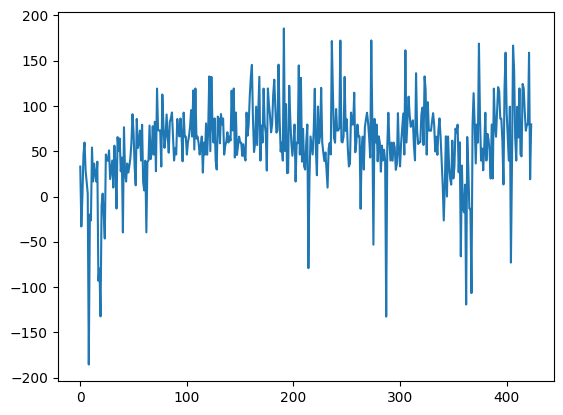

In [35]:

# 실제 우리가 만든 데이터로 위 과정을 다시해보자!
import matplotlib.pyplot as plt

tmp_y = pd.read_csv("./models/seoul-data-lecture-d3-1-y.csv")
tmp_x = pd.read_csv("./models/seoul-data-lecture-d3-1-x.csv")
tmp_name = list(tmp_y.columns)

tmp_y.shape
tmp_x.shape
# x: (671, 455), y: (671,424) 
x = np.array(tmp_x)
y = np.array(tmp_y)
district_name = [str(tmp_name[i])[1:] for i in range(y.shape[1])]

p = x.shape[1]; q = y.shape[1]
p1 = y.shape[1]
p2 = x.shape[1] - y.shape[1]
n = x.shape[0]


x1 = x[:,:p1]
x2 = x[:, p1:]
x1.shape
x2.shape

# type 1
# update가 가능한 model 만들기 (변수들의 이름을 관리함)
# 1. input 정의하기
# 2. output 정의하기
# 3. 모델만들기

input1 = K.layers.Input(p1)
input2 = K.layers.Input(p2)
h1 = K.layers.Dense(10, activation = 'sigmoid')(input1)
h2 = K.layers.Dense(5, activation = 'sigmoid')(input2)
h3 = tf.keras.layers.Concatenate(axis = 1)([h1,h2])
output = K.layers.Dense(p1, activation = 'linear')(h3)
my_model = K.models.Model([input1, input2], output)
my_model.summary()
# output evaluation 확인하기
my_model([x1,x2])


optimizer = K.optimizers.SGD(0.1)
with tf.GradientTape() as tape:
  yhat = my_model([x1,x2])
  s2 = tf.square(y-yhat)
  loss = tf.reduce_sum(s2)
  
grad = tape.gradient(loss, my_model.trainable_weights)
optimizer.apply_gradients(zip(grad, my_model.trainable_weights))

optimizer = K.optimizers.SGD(0.5)

# estimation
for i in range(10000):
    with tf.GradientTape() as tape:
        yhat = my_model([x1,x2])
        s2 = tf.square(y-yhat)
        loss = tf.reduce_mean(s2)
    grad = tape.gradient(loss, my_model.trainable_weights)
    optimizer.apply_gradients(zip(grad, my_model.trainable_weights))
    if (i%100==0):
        print("loss >>", loss,'\n')
 
v = my_model([x1,x2])
err = np.mean(y-v.numpy(), axis = 0)
err.mean()
plt.plot(err)